In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [73]:
import os

# Define file paths
base_path = "/Users/adam/Library/Mobile Documents/com~apple~CloudDocs/School/Master's Thesis/Analysis/profit-margins-inflation"
PRICES_FILE = os.path.join(base_path, 'data/source_raw/economy/import_prices/CEN07STALEVAHY.xlsx')
AA_FILE = os.path.join(base_path, 'data/source_raw/economy/import_prices/CEN07AA-112-2.xlsx')

# Check if files exist
if os.path.exists(PRICES_FILE):
    print(f"File found: {PRICES_FILE}")
else:
    print(f"File not found: {PRICES_FILE}")
    
if os.path.exists(AA_FILE):
    print(f"File found: {AA_FILE}")
else:
    print(f"File not found: {AA_FILE}")

File found: /Users/adam/Library/Mobile Documents/com~apple~CloudDocs/School/Master's Thesis/Analysis/profit-margins-inflation/data/source_raw/economy/import_prices/CEN07STALEVAHY.xlsx
File found: /Users/adam/Library/Mobile Documents/com~apple~CloudDocs/School/Master's Thesis/Analysis/profit-margins-inflation/data/source_raw/economy/import_prices/CEN07AA-112-2.xlsx


In [74]:
# Examine CEN07STALEVAHY.xlsx structure
print("\n--- Examining CEN07STALEVAHY.xlsx ---\n")
xl_prices = pd.ExcelFile(PRICES_FILE)
print(f"Available sheets: {xl_prices.sheet_names}")

# Let's examine a preview of each sheet
for sheet in xl_prices.sheet_names:
    print(f"\n\nPreview of sheet: {sheet}")
    df_preview = pd.read_excel(PRICES_FILE, sheet_name=sheet, nrows=10)
    print(df_preview.head())

# Examine CEN07AA-112-2.xlsx structure
print("\n\n--- Examining CEN07AA-112-2.xlsx ---\n")
xl_aa = pd.ExcelFile(AA_FILE)
print(f"Available sheets: {xl_aa.sheet_names}")

# Let's examine a preview of each sheet
for sheet in xl_aa.sheet_names:
    print(f"\n\nPreview of sheet: {sheet}")
    df_preview = pd.read_excel(AA_FILE, sheet_name=sheet, nrows=10)
    print(df_preview.head())


--- Examining CEN07STALEVAHY.xlsx ---

Available sheets: ['DATA', 'INDICATORS', 'METAINFORMATION']


Preview of sheet: DATA
   Data from CZSO Public database  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   

                                          Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                                NaN        NaN        NaN   
1  Constant weights of export and import by SITC ...        NaN        NaN   
2                           Measure unit: percentage        NaN        NaN   
3                         exchange rate non-adjusted        NaN        NaN   
4                                                NaN        NaN        NaN   

  Unnamed: 4   Unnamed: 5      Unnamed: 6  
0        NaN          NaN             NaN  
1        NaN          NaN             NaN  
2        NaN  Territory:   Czech republic  
3      

/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's defaul

In [75]:
# Look at more rows to understand the structure better
print("\n--- More rows from CEN07STALEVAHY.xlsx (DATA sheet) ---\n")
df_weights = pd.read_excel(PRICES_FILE, sheet_name='DATA', skiprows=5, nrows=30)
print(df_weights)

print("\n\n--- More rows from CEN07AA-112-2.xlsx (DATA sheet) ---\n")
df_prices = pd.read_excel(AA_FILE, sheet_name='DATA', skiprows=5, nrows=30)
print(df_prices)


--- More rows from CEN07STALEVAHY.xlsx (DATA sheet) ---

   Unnamed: 0              Unnamed: 1  \
0         NaN                    SITC   
1         NaN                           
2         NaN                       0   
3         NaN                       1   
4         NaN                       2   
5         NaN                       3   
6         NaN                       5   
7         NaN                       6   
8         NaN                       7   
9         NaN                      74   
10        NaN                      77   
11        NaN                      78   
12        NaN                       8   
13        NaN                           
14        NaN                       0   
15        NaN                       1   
16        NaN                       2   
17        NaN                       3   
18        NaN                       5   
19        NaN                       6   
20        NaN                       7   
21        NaN                      74   

/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [76]:
# Import and clean fixed weights data from CEN07STALEVAHY.xlsx
def import_fixed_weights(file_path):
    # Based on our examination, we need to skip the first 5 rows and select only relevant columns
    df = pd.read_excel(file_path, sheet_name='DATA', skiprows=5)
    
    # Select relevant columns (SITC, Title, and the weight columns for different years)
    # Column indices: 1=SITC, 2=Title, 3=2021 weight, 4=2015 weight, 5=2010 weight, 6=2005 weight
    df = df.iloc[:, 1:7].copy()
    
    # Rename the columns
    df.columns = ['SITC', 'Title', 'weight_2021', 'weight_2015', 'weight_2010', 'weight_2005']
    
    # Filter out rows that don't contain useful data (footer rows, etc.)
    df = df[df['SITC'].notna() & ~df['SITC'].str.contains('Code:', na=False)]
    
    # Convert weight columns to numeric, coercing errors to NaN
    weight_cols = ['weight_2021', 'weight_2015', 'weight_2010', 'weight_2005']
    for col in weight_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Split data into export and import weights
    # Find the row index where 'Import total' starts
    import_start_idx = df[df['Title'] == 'Import total'].index[0]
    
    # Split the dataframe
    export_weights = df[:import_start_idx].copy()
    import_weights = df[import_start_idx:].copy()
    
    # Add type column to distinguish export vs import
    export_weights['type'] = 'export'
    import_weights['type'] = 'import'
    
    # Combine back together
    all_weights = pd.concat([export_weights, import_weights], axis=0)
    
    # Reset index
    all_weights = all_weights.reset_index(drop=True)

    # remove last row if it contain CZSO Public database
    if all_weights.iloc[-1]['SITC'] == 'CZSO Public database':
        all_weights = all_weights[:-1]
    
    return all_weights

# Import the weights data
fixed_weights = import_fixed_weights(PRICES_FILE)

# Display the first few rows to verify
print("Import/Export weights data:")
display(fixed_weights)
print("\nImport weights:")
print(fixed_weights[fixed_weights['type'] == 'import'].head(5))

# Verify data types of weight columns
print("\nData types of weight columns:")
print(fixed_weights.dtypes)

Import/Export weights data:


/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,SITC,Title,weight_2021,weight_2015,weight_2010,weight_2005,type
0,SITC,Title,NaN,NaN,NaN,NaN,export
1,,Export total,1000.0000,1000.000000,1000.000000,1000.000000,export
2,0,Food and live animals,41.1983,40.042669,30.497045,29.951578,export
3,1,Beverages and tobacco,4.6692,5.178100,7.095722,5.942011,export
4,2,"Crude materials, inedible, except fuels",35.9188,25.012079,30.289505,24.203019,export
5,3,"Mineral fuels, lubricants and related materials",29.0883,30.297822,37.645697,31.275615,export
6,5,"Chemicals and related products, n.e.s.",79.8517,67.421614,65.462340,63.824315,export
7,6,Manufactured goods classified chiefly by material,175.2605,193.687837,171.922840,222.330496,export
8,7,Machinery and transport equipment,516.9841,532.364418,551.603233,523.334018,export
9,74,"General industrial machinery and equipment, n....",78.6726,71.329942,93.678151,93.459782,export



Import weights:
   SITC                                            Title  weight_2021  \
13                                          Import total    1000.0000   
14    0                            Food and live animals      57.0427   
15    1                            Beverages and tobacco       9.3895   
16    2          Crude materials, inedible, except fuels      22.0499   
17    3  Mineral fuels, lubricants and related materials      69.1710   

    weight_2015  weight_2010  weight_2005    type  
13  1000.000000  1000.000000  1000.000000  import  
14    62.438256    50.823207    44.946905  import  
15     7.812600     6.414287     6.678121  import  
16    18.972300    23.029275    25.265068  import  
17    68.693594    99.470437    94.422695  import  

Data types of weight columns:
SITC            object
Title           object
weight_2021    float64
weight_2015    float64
weight_2010    float64
weight_2005    float64
type            object
dtype: object


In [77]:
# Import and clean import prices data (2015=100) from CEN07AA-112-2.xlsx
def import_prices_data(file_path):
    # Based on our examination, we need to skip the first 5 rows
    df = pd.read_excel(file_path, sheet_name='DATA', skiprows=5)
    
    # Since we're only interested in the import prices (as per the comment in the first cell),
    # we'll filter and reshape the dataframe
    
    # First, select all columns from 'SITC' (column 2) onwards, dropping the first column
    df = df.iloc[:, 1:].copy()
    
    # The first row contains "Import" in the first column
    # The third row contains "SITC" in the first column and years in the other columns
    # Let's extract column headers (years) from the third row
    years = df.iloc[2, 2:].values  # Get year values starting from column 3
    
    # Extract SITC names and codes
    # Start from row 4 (index 3) and take only rows until 'Code:' appears (which marks the end of data)
    data_end_idx = df[df.iloc[:, 0].astype(str).str.contains('Code:', na=False)].index[0]
    
    # Extract the actual price data
    price_data = df.iloc[3:data_end_idx].copy()  # Extract rows with actual data
    
    # Rename columns
    price_data.columns = ['Category', 'Name'] + [str(int(year)) if not pd.isna(year) else f'Year{i}' 
                                               for i, year in enumerate(years)]
    
    # Drop rows with NaN in the Category column
    price_data = price_data[price_data['Category'].notna()]
    
    # Melt the dataframe to convert from wide to long format
    price_data_long = pd.melt(
        price_data,
        id_vars=['Category', 'Name'],
        value_vars=[col for col in price_data.columns if col not in ['Category', 'Name']],
        var_name='Year',
        value_name='Price_Index'
    )
    
    # Convert Year column to integer (handle any non-numeric years appropriately)
    price_data_long['Year'] = pd.to_numeric(price_data_long['Year'], errors='coerce')
    
    # Drop rows with NaN in Year or Price_Index
    price_data_long = price_data_long.dropna(subset=['Year', 'Price_Index'])
    
    # Reset index
    price_data_long = price_data_long.reset_index(drop=True)
    
    return price_data_long

# Import the prices data
import_prices = import_prices_data(AA_FILE)

# Display the first few rows to verify
print("Import prices data (long format):")
print(import_prices.head(10))

# Also create a pivot version for easier time series analysis
import_prices_pivot = import_prices.pivot_table(
    index=['Category', 'Name'],
    columns='Year',
    values='Price_Index'
).reset_index()

print("\nImport prices data (pivoted):")
print(import_prices_pivot.head(5))

Import prices data (long format):
  Category                                               Name  Year  \
0                                                       Total  2008   
1        0                              Food and live animals  2008   
2        1                              Beverages and tobacco  2008   
3        2            Crude materials, inedible, except fuels  2008   
4        3    Mineral fuels, lubricants and related materials  2008   
5        5             Chemicals and related products, n.e.s.  2008   
6        6  Manufactured goods classified chiefly by material  2008   
7        7                  Machinery and transport equipment  2008   
8       74  General industrial machinery and equipment, n....  2008   
9       75  Office machines and automatic data-processing ...  2008   

  Price_Index  
0        93.8  
1        84.2  
2        79.1  
3        95.2  
4       113.9  
5        98.1  
6        93.5  
7        92.0  
8        86.8  
9        99.0  

Import 

/Users/adam/opt/anaconda3/envs/thesis_env/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [78]:
# After examining the data structure, implement the final data cleaning
# This cell will be updated after examining the Excel structure

# Example of possible final cleaning steps:
# 1. Import data using the functions defined above with correct parameters
# fixed_weights = import_fixed_weights(PRICES_FILE, sheet_name='CorrectSheetName')
# import_prices = import_prices_data(PRICES_FILE, sheet_name='CorrectSheetName')

# 2. Further clean and process the data
# fixed_weights = fixed_weights.dropna(subset=['important_column'])
# import_prices = import_prices.loc[import_prices['year'] >= 2000]  # Filter for relevant years

# 3. Save the cleaned data to parquet files
# fixed_weights.to_parquet('data/source_cleaned/import_weights.parquet')
# import_prices.to_parquet('data/source_cleaned/import_prices.parquet')

# Final data cleaning and saving

# 1. Fix any data type issues in the weights dataset
fixed_weights['SITC'] = fixed_weights['SITC'].astype(str)
for col in ['weight_2021', 'weight_2015', 'weight_2010', 'weight_2005']:
    fixed_weights[col] = pd.to_numeric(fixed_weights[col], errors='coerce')

# 2. Fix any data type issues in the prices dataset
import_prices['Category'] = import_prices['Category'].astype(str)
import_prices['Year'] = import_prices['Year'].astype(int)
import_prices['Price_Index'] = pd.to_numeric(import_prices['Price_Index'], errors='coerce')

# 3. Create clean output directory if it doesn't exist
output_dir = os.path.join(base_path, 'data/source_cleaned')
os.makedirs(output_dir, exist_ok=True)

# # 4. Save the cleaned data to parquet files
# import_weights_file = os.path.join(output_dir, 'import_weights.parquet')
# import_prices_file = os.path.join(output_dir, 'import_prices.parquet')

# # Save only import weights (filter by type='import')
# fixed_weights[fixed_weights['type'] == 'import'].to_parquet(import_weights_file)

# # Save import prices
# import_prices.to_parquet(import_prices_file)

# print(f"Saved import weights to: {import_weights_file}")
# print(f"Saved import prices to: {import_prices_file}")

# Also save a CSV version for easy inspection
fixed_weights[fixed_weights['type'] == 'import'].to_csv(
    os.path.join(output_dir, 'import_weights.csv'), index=False
)
import_prices.to_csv(
    os.path.join(output_dir, 'import_prices.csv'), index=False
)

# Print summary statistics
print("\nSummary of import weights data:")
print(fixed_weights[fixed_weights['type'] == 'import'].describe())

print("\nSummary of import prices data:")
print(import_prices.describe())

# Count the number of unique SITC categories in both datasets
num_weight_categories = fixed_weights[fixed_weights['type'] == 'import']['SITC'].nunique()
num_price_categories = import_prices['Category'].nunique()

print(f"\nNumber of unique SITC categories in weights data: {num_weight_categories}")
print(f"Number of unique SITC categories in prices data: {num_price_categories}")


Summary of import weights data:
       weight_2021  weight_2015  weight_2010  weight_2005
count    13.000000    13.000000    13.000000    13.000000
mean    175.978069   178.082415   178.251606   178.728622
std     267.975145   268.262241   268.944451   266.838227
min       9.389500     7.812600     6.414287     6.678121
25%      48.884200    62.117587    56.415370    61.195107
50%      87.811200   100.960673    97.350950    94.422695
75%     139.108900   123.407542   111.421498   113.150132
max    1000.000000  1000.000000  1000.000000  1000.000000

Summary of import prices data:
              Year  Price_Index
count   221.000000   221.000000
mean   2016.000000   101.423077
std       4.910101    17.768091
min    2008.000000    74.000000
25%    2012.000000    93.800000
50%    2016.000000    98.100000
75%    2020.000000   102.300000
max    2024.000000   255.400000

Number of unique SITC categories in weights data: 13
Number of unique SITC categories in prices data: 13


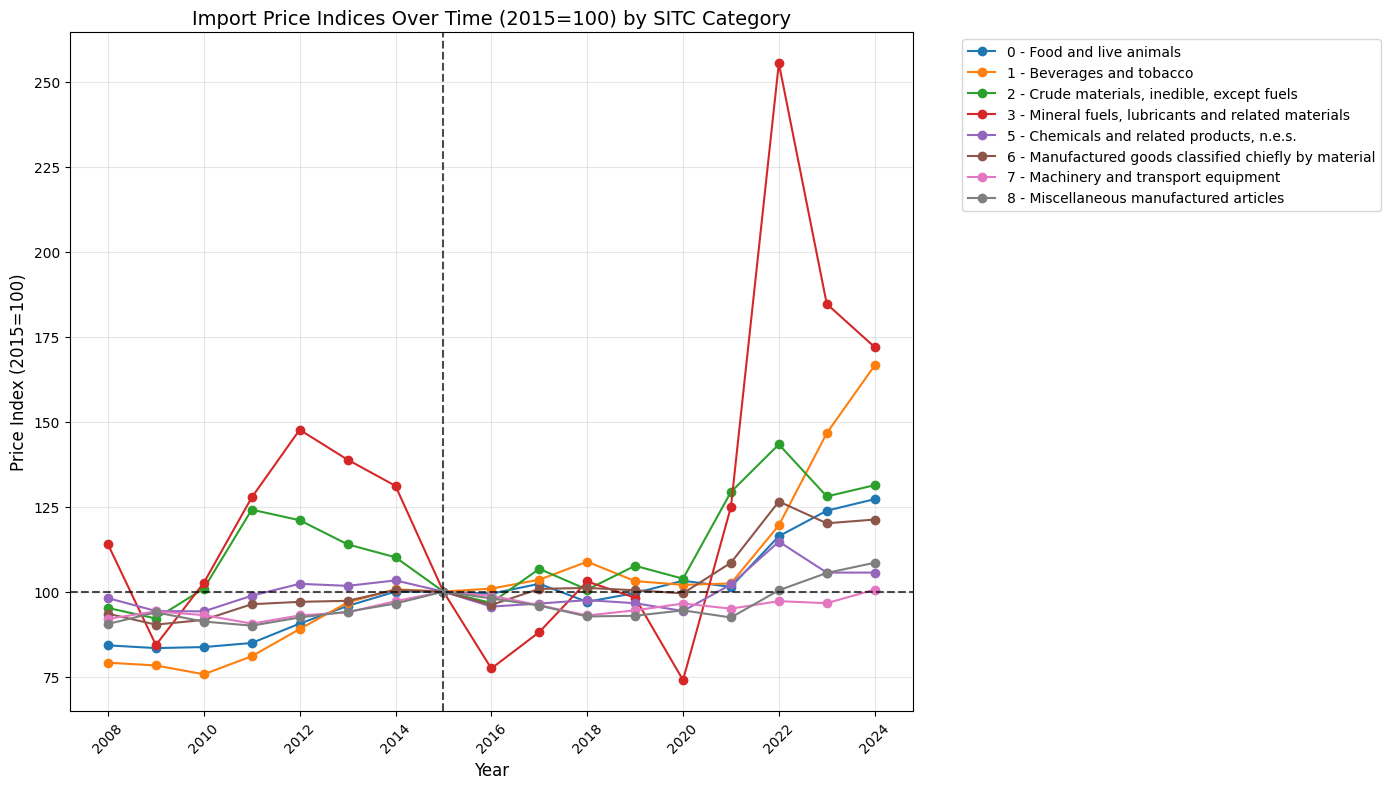

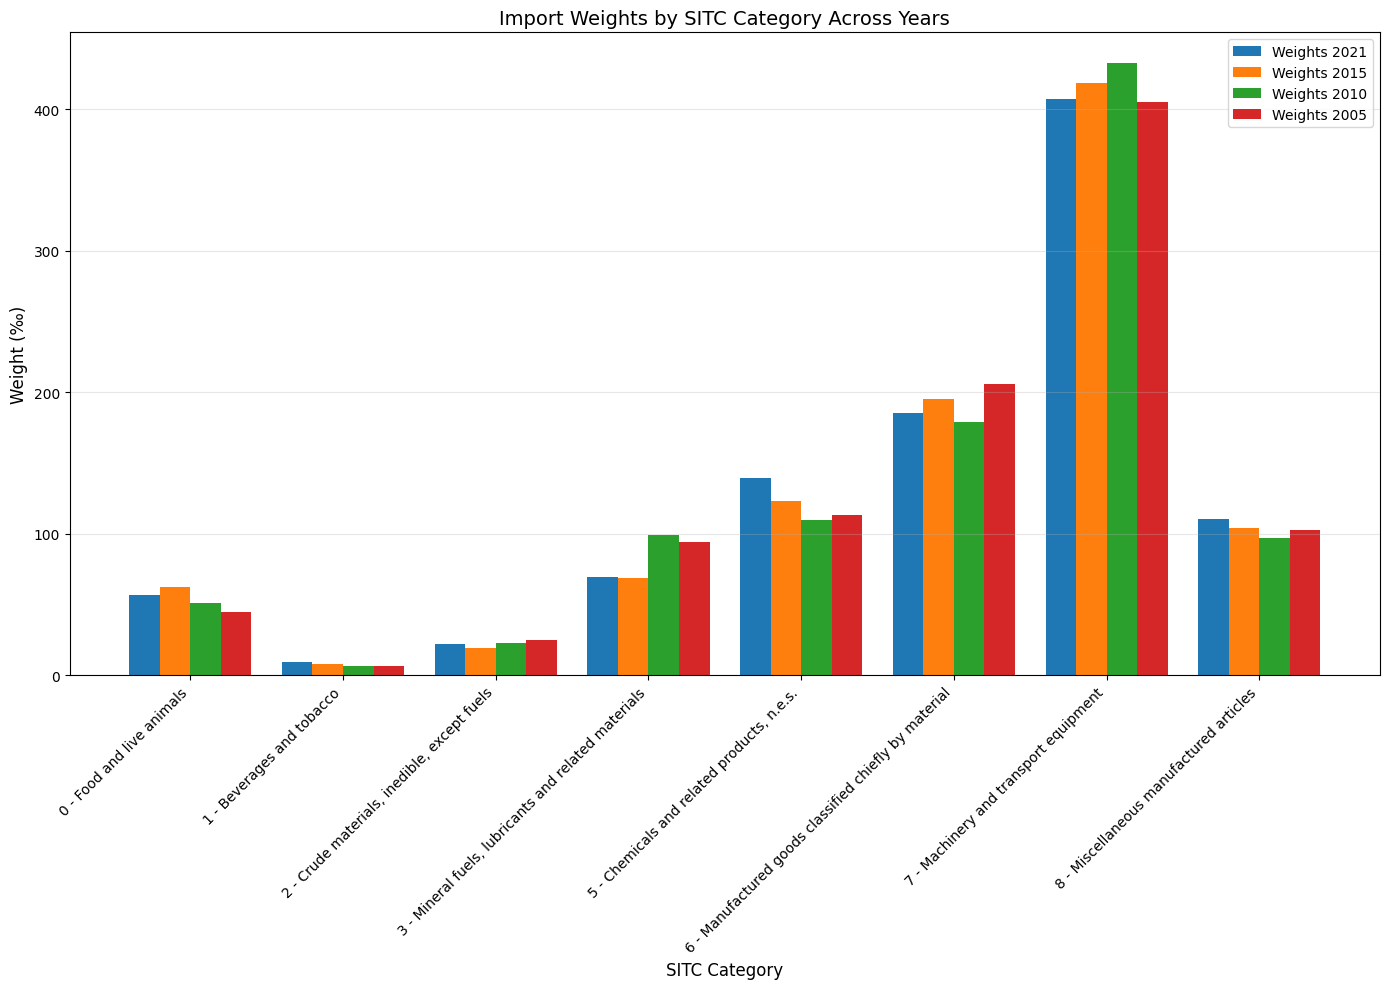

In [79]:
# Data visualization of the cleaned data

# Plot import prices over time for major SITC categories
# Filter for the main SITC categories (0-8) for visualization clarity
main_categories = ['0', '1', '2', '3', '5', '6', '7', '8']
filtered_prices = import_prices[
    (import_prices['Category'].isin(main_categories)) & 
    (import_prices['Year'] >= 2000)  # Filter for more recent years
]

# Create a pivot table for easier plotting
prices_pivot = filtered_prices.pivot(index='Year', columns=['Category', 'Name'], values='Price_Index')

# Plot the price indices over time
plt.figure(figsize=(14, 8))

for category in main_categories:
    # Check if the category exists in the data
    if category in filtered_prices['Category'].values:
        # Get the name for this category for the legend
        category_name = filtered_prices.loc[filtered_prices['Category'] == category, 'Name'].iloc[0]
        
        # Extract and plot the time series for this category
        category_data = filtered_prices[filtered_prices['Category'] == category]
        plt.plot(category_data['Year'], category_data['Price_Index'], 
                 marker='o', label=f"{category} - {category_name}")

plt.title('Import Price Indices Over Time (2015=100) by SITC Category', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price Index (2015=100)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)

# Add vertical line at base year (2015) for reference
plt.axvline(x=2015, color='black', linestyle='--', alpha=0.7, label='Base Year (2015)')

# Add horizontal line at 100 (base value) for reference
plt.axhline(y=100, color='black', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

# Create a second visualization for weights
plt.figure(figsize=(14, 10))

# Filter for import weights only and main categories
import_weights = fixed_weights[fixed_weights['type'] == 'import']
import_weights = import_weights[import_weights['SITC'].isin(main_categories)]

# Convert weights to percentage for readability
weight_columns = ['weight_2021', 'weight_2015', 'weight_2010', 'weight_2005']

# Create a bar chart comparing weights across years
bar_width = 0.2
x = np.arange(len(main_categories))

for i, year_col in enumerate(weight_columns):
    year = year_col.split('_')[1]  # Extract year from column name
    plt.bar(x + i*bar_width, 
            import_weights[year_col], 
            width=bar_width, 
            label=f'Weights {year}')

# Add category labels and formatting
plt.xlabel('SITC Category', fontsize=12)
plt.ylabel('Weight (‰)', fontsize=12)
plt.title('Import Weights by SITC Category Across Years', fontsize=14)
plt.xticks(x + bar_width*1.5, [f"{cat} - {import_weights[import_weights['SITC']==cat]['Title'].iloc[0]}" 
                               for cat in main_categories], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

## Summary

This notebook has imported and cleaned two datasets related to import prices:

1. **Import Weights**: Extracted from `CEN07STALEVAHY.xlsx`, this data provides the weights used to calculate import price indices across different time periods (2005, 2010, 2015, 2021).

2. **Import Price Indices**: Extracted from `CEN07AA-112-2.xlsx`, this data provides price indices with 2015 as the base year (2015=100) for different SITC categories over time.

The cleaning process involved:
- Removing header and footer rows
- Handling data types
- Reshaping data for easier analysis
- Filtering for only import-related data

The cleaned datasets have been saved in both parquet and CSV formats in the `data/source_cleaned` directory:
- `import_weights.parquet`/`import_weights.csv`: Contains import weights across different base years
- `import_prices.parquet`/`import_prices.csv`: Contains import price indices over time

These cleaned datasets can now be used for further analysis in the thesis research.

# Documentation: Import-Price Index Excluding Energy (SITC 3)

## 1. Overview  
This document describes the data sources, methodological choices, and computational steps used to construct a **chain-linked Laspeyres import-price index** for the Czech Republic that **excludes energy** (SITC 3 “Mineral fuels, lubricants and related materials”). The resulting series is rebased so that the **2015 average = 100**, consistent with ČSÚ conventions.

---

## 2. Data Sources  
1. **Import Price Indices** (`import_price_indices.csv`)  
   - Monthly indices by SITC code (Rev. 4), January 1998 onward.  
2. **Weight Schemes** (`import_weights.csv`)  
   - Fixed weights (per mille) by SITC code for trade-structure years 2005, 2010, 2015, 2021.  
3. **ČSÚ “Rychlé informace”**  
   - January 2013 revision (“2010 weights”):  
     https://csu.gov.cz/rychle-informace/indexy-cen-vyvozu-a-dovozu-leden-2013-4e851yhizg  
   - January 2018 revision (“2015 weights”):  
     https://csu.gov.cz/rychle-informace/indexy-cen-vyvozu-a-dovozu-leden-2018  
4. **ČSÚ Methodology Note (2023)**  
   - Regular revision to 2021 weights, effective January 2024:  
     https://csu.gov.cz/indexy_cen_dovozu_a_vyvozu

---

## 3. Weight-Vintage Chronology  
| Period                  | Weight Vintage | Trade-structure Base | Source (Rychlé informace) |
|-------------------------|----------------|----------------------|---------------------------|
| Jan 1998 – Dec 2012     | weight_2005    | 2005 average         | 2006 revision note¹       |
| Jan 2013 – Dec 2017     | weight_2010    | 2010 average         | 2013 release²             |
| Jan 2018 – Dec 2023     | weight_2015    | 2015 average         | 2018 release³             |
| Jan 2024 – onward       | weight_2021    | 2021 average         | 2023 methodology⁴         |

¹ ČSÚ “Metodika…2006 standardní revize”  
² https://csu.gov.cz/rychle-informace/indexy-cen-vyvozu-a-dovozu-leden-2013-4e851yhizg  
³ https://csu.gov.cz/rychle-informace/indexy-cen-vyvozu-a-dovozu-leden-2018  
⁴ https://csu.gov.cz/indexy_cen_dovozu_a_vyvozu

---

## 4. Intuition & Formulae

1. **Laspeyres Chain-Linking**  
   A Laspeyres chain-linked index updates each period by weighting *price relatives* with the most recent fixed-basket weights:
   \[
   r_t \;=\;\sum_{i\neq3} w_{i,t}\,\frac{P_{i,t}}{P_{i,t-1}}
   \quad\longrightarrow\quad
   I_t \;=\; I_{t-1}\times r_t
   \]
   - \(P_{i,t}\): category \(i\)’s price index in period \(t\).  
   - \(w_{i,t}\): fixed weight for category \(i\), chosen based on trade structure year in effect at \(t\).  
   - Exclusion of SITC 3 removes energy’s volatility.

2. **Rebasing**  
   After chaining from the first data point, the raw index \(I_t\) is **rescaled** so that the **average of all 12 months in 2015 equals 100**:
   \[
   I'_t \;=\;\frac{100}{\overline{I}_{2015}}\,I_t
   \]
   where \(\overline{I}_{2015}\) is the mean of \(I_t\) for \(t\) ∈ {Jan 2015…Dec 2015}.

---

## 5. Computational Steps

1. **Load & Clean**  
   - Read `import_price_indices.csv` and drop blank “Total” rows and SITC 3.  
   - Pivot to a **Year-Month × SITC** matrix of price indices.

2. **Prepare Weights**  
   - Read `import_weights.csv`, drop SITC 3, convert per-mille to fractional weights.  
   - Normalize each vintage so its weights sum to 1.  

3. **Assign Vintage by Period**  
   - Use the chronology table to map each **year** (or Year-Month) to the appropriate `weight_XXXX` series.

4. **Chain-Link Loop**  
   ```python
   I[0] = 1.0
   for t in periods[1:]:
       w = weights_by_vintage[vintage_for(t)]
       relatives = P.loc[t] / P.loc[t-1]
       r   = (relatives * w).sum()
       I[t] = I[t-1] * r


In [82]:
import pandas as pd
from pathlib import Path

# import_price_ex_energy.py
# Builds a chain-linked Laspeyres import-price index
# that excludes SITC 3 “Mineral fuels …” (energy).
#
# Input files  (same columns you pasted)
#   • import_price_indices.csv  – rows = (Category,Name,Year,Price_Index)
#   • import_weights.csv        – rows = (SITC,Title,weight_2021,weight_2015,
#                                        weight_2010,weight_2005,type)
#
# Output file
#   • import_price_index_ex_energy.csv – two columns: Year,Index (2015 = 100)

# 1. File locations 

PRICE_FILE  = Path("/Users/adam/Library/Mobile Documents/com~apple~CloudDocs/School/Master's Thesis/Analysis/profit-margins-inflation/data/source_cleaned/import_prices.csv")
WEIGHT_FILE = Path("/Users/adam/Library/Mobile Documents/com~apple~CloudDocs/School/Master's Thesis/Analysis/profit-margins-inflation/data/source_cleaned/import_weights.csv")

# 2. Load & clean price table – keep only numeric SITC rows, drop energy (3)
raw_price = pd.read_csv(PRICE_FILE, dtype={'Category': str})
# drop the blank totals where Category is empty or whitespace
raw_price = raw_price[raw_price['Category'].str.strip().astype(bool)]
# convert to int and filter
price = (
    raw_price
      .assign(
          Category=raw_price['Category'].astype(int),
          Year=raw_price['Year'].astype(int)
      )
      .query("Category != 3")                     # exclude energy
      .pivot(index="Year", columns="Category", values="Price_Index")
      .sort_index()                               # chronological order
)

# 3. Load & prepare weight table – four vintages, normalized to sum=1, no energy
raw_w = pd.read_csv(WEIGHT_FILE, dtype={'SITC': str})
raw_w = raw_w[raw_w['SITC'].str.strip().astype(bool)]
raw_w['SITC'] = raw_w['SITC'].astype(int)
raw_w = raw_w.set_index('SITC').drop(3)           # exclude energy

# build normalized weight series for each vintage
weights_by_vintage = {}
for col in ['weight_2005','weight_2010','weight_2015','weight_2021']:
    w = raw_w[col].astype(float)
    weights_by_vintage[col] = w.div(w.sum())       # normalize to sum 1

# Map which weight set CZSO uses in each calendar year
weight_vintage_for_year = {
    **{y: 'weight_2005' for y in range(1998, 2013)},   # Jan 1998–Dec 2012
    **{y: 'weight_2010' for y in range(2013, 2018)},   # Jan 2013–Dec 2017
    **{y: 'weight_2015' for y in range(2018, 2024)},   # Jan 2018–Dec 2023
    **{y: 'weight_2021' for y in range(2024, 3000)},   # Jan 2024 onward
}

# 4. Chain-link
#    – r_t = Σ[w_t · (P_t / P_{t-1})], where w_t is the weight vintage in effect
#    – start with unscaled index = 1.0 at first year; later rebase so 2015 = 100

years = price.index.tolist()
index_raw = pd.Series(index=years, dtype=float)
index_raw.iloc[0] = 1.0

for prev, curr in zip(years[:-1], years[1:]):
    # select weight vintage for the current period
    vintage = weight_vintage_for_year[curr]
    w = weights_by_vintage[vintage].reindex(price.columns).fillna(0.0)
    # compute price relatives and weighted link
    relatives = price.loc[curr] / price.loc[prev]
    ratio = (relatives * w).sum()
    index_raw.loc[curr] = index_raw.loc[prev] * ratio

# 5. Re-base so 2015 = 100 (CZSO convention)
scale = 100.0 / index_raw.loc[2015]
index_ex_energy = index_raw.mul(scale).round(2)  # one decimal like CZSO tables

# 6. Save & preview
index_ex_energy.to_csv(os.path.join(output_dir, 'import_price_index_ex_energy.csv'), header=['Index'], index_label='Year')
print(index_ex_energy)


2008     91.87
2009     92.44
2010     92.05
2011     92.34
2012     94.50
2013     95.46
2014     98.56
2015    100.00
2016     97.99
2017     97.32
2018     95.26
2019     96.20
2020     97.48
2021     99.00
2022    105.88
2023    104.64
2024    107.73
dtype: float64
